In [302]:
import pandas as pd

In [ ]:
#Ниже представлен код по лучшему сабмиту команды номер 3.
#Члены команды: Иванов Дмитрий, Анастасия Перевозникова,  Павел Пестряков, Алексей(Alexlaru) и я, Бабенко Глеб =)
#Также, в третьей ячейке снизу добавлены строчки кода Иванова Дмитрия, так как его результат был получен методом knn,
#на случай, если данный метод менее чувствителен к увеличению тестовой выборки.

In [5]:
train = pd.read_csv('train.csv', index_col='_id')

In [10]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
_id,,,,,,,,,,,,,,,,,,,,,
df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [7]:
test = pd.read_csv('test.csv', index_col='_id')

In [8]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
_id,,,,,,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,mon,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,fri,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 21 columns):
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16476 entries, 66810d8e6bf2b41c880a7bc6c8a1e295 to 82db4c5dd22e8182b30917571fe77c4d
Data columns (total 20 columns):
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(1

In [13]:
import numpy as np

In [14]:
train.loc[:,'sample'] = 'train'
test.loc[:,'target'] = np.nan

In [17]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
_id,,,,,,,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,NaN
ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,NaN
fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,NaN
ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,NaN
1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,NaN


In [18]:
test.loc[:,'sample'] = 'test'

In [26]:
all_data = test.append(train).reset_index(drop=False)

In [27]:
all_data.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,sample
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,NaN,test
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,NaN,test
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,NaN,test
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,NaN,test
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,NaN,test


In [32]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object' and i != '_id':
        print (i)
        print (set(all_data[i]))

job
{'blue-collar', 'management', 'housemaid', 'retired', 'self-employed', 'student', 'unknown', 'services', 'entrepreneur', 'admin.', 'technician', 'unemployed'}
marital
{'divorced', 'single', 'unknown', 'married'}
education
{'basic.9y', 'illiterate', 'high.school', 'unknown', 'basic.6y', 'university.degree', 'professional.course', 'basic.4y'}
default
{'yes', 'unknown', 'no'}
housing
{'unknown', 'yes', 'no'}
loan
{'unknown', 'yes', 'no'}
contact
{'cellular', 'telephone'}
month
{'jul', 'dec', 'aug', 'apr', 'sep', 'oct', 'jun', 'nov', 'mar', 'may'}
day_of_week
{'fri', 'mon', 'thu', 'wed', 'tue'}
poutcome
{'success', 'failure', 'nonexistent'}
sample
{'test', 'train'}


In [34]:
print (all_data[all_data['default'] == 'unknown']['_id'].count())
print (all_data[all_data['housing'] == 'unknown']['_id'].count())
print (all_data[all_data['loan'] == 'unknown']['_id'].count())

8597
990
990


<br><br><br><br><br><b>Начнем эксперименты</b>

In [36]:
predata = pd.get_dummies(data = all_data, columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', \
                                                    'poutcome'])

In [39]:
predata1 = predata.drop(['default', 'housing', 'loan'], axis = 1)

In [49]:
tr_predata1 = predata1.query('sample == "train"').drop(['sample'], axis = 1)
ts_predata1 = predata1.query('sample == "test"').drop(['sample','target'], axis = 1)

In [52]:
X = tr_predata1.drop(['target','_id'],axis = 1)
y = list(tr_predata1['target'])

In [54]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

dtc.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)

predict_dtc = dtc.predict(X_test)
predict_knn = knn.predict(X_test)
predict_lr = lr.predict(X_test)

predict_proba_dtc = dtc.predict_proba(X_test)
predict_proba_knn = knn.predict_proba(X_test)
predict_proba_lr = lr.predict_proba(X_test)

In [91]:
print ('DecisionTreeClassifier', roc_auc_score(y_test, predict_proba_dtc[:,1]))
print ('KNeighborsClassifier', roc_auc_score(y_test, predict_proba_knn[:,1]))
print ('LogisticRegression', roc_auc_score(y_test, predict_proba_lr[:,1]))

DecisionTreeClassifier 0.7318587567898273
KNeighborsClassifier 0.8630932168431944
LogisticRegression 0.9335234638413548


In [82]:
all_data.iloc[:,11:].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,sample
0,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,NaN,test
1,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,NaN,test
2,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,NaN,test
3,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,NaN,test
4,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,NaN,test


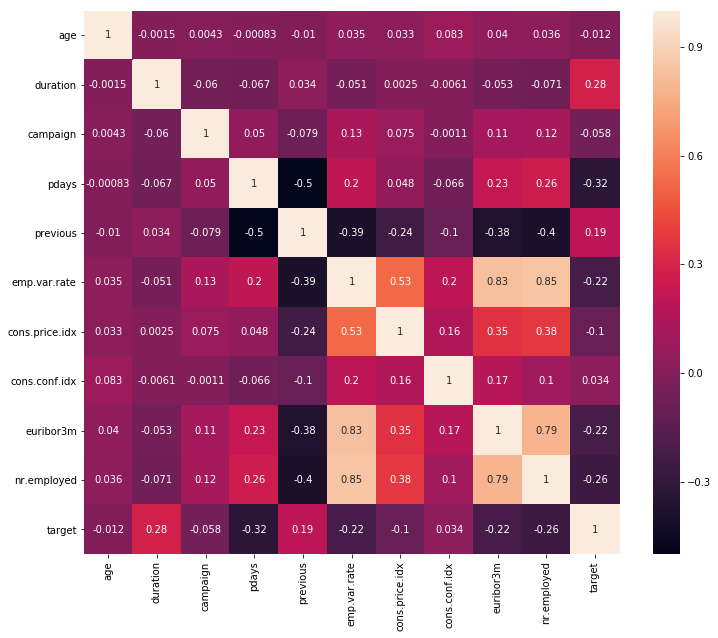

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 10))
sns.heatmap(all_data.corr('kendall'), annot=True);

In [ ]:
X1 = X.drop['']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
target            24712 non-null float64
sample    

In [190]:
predata2 = pd.get_dummies(data = all_data, columns = ['marital', 'job', 'month',  \
                                                    'poutcome', 'housing' ])
predata2 = predata2.drop(['loan','day_of_week', 'education', 'contact', 'default', 'previous'], axis = 1)

tr_predata2 = predata2.query('sample == "train"').drop(['sample'], axis = 1)
ts_predata2 = predata2.query('sample == "test"').drop(['sample','target'], axis = 1)

X1 = tr_predata2.drop(['target','_id'],axis = 1)
y1 = list(tr_predata2['target'])
id = list(tr_predata2['_id']) #ЭТО ПЛОХО!! НУЖНО ИСПРАВИТЬ!
m=[1.,2.]
for k in np.linspace(0.01,0.99,50):
    for i in range(100):
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=k, random_state=i)

        lr1 = LogisticRegression(tol=0.00001)

        lr1.fit(X1_train, y1_train)

        predict_lr1 = lr1.predict(X1_test)
        predict_proba_lr1 = lr1.predict_proba(X1_test)
        m.append(float(i))
        m.append(float(k))
        m.append(roc_auc_score(y1_test, predict_proba_lr1[:,1]))

In [192]:
m = np.array(m)
n = m[m<0.99]
np.max(n)

0.9807006503041746

In [219]:
d = m[m>0.941]
np.min(d)


0.941003424569354

In [220]:
np.where(m==0.941003424569354)[0]

array([706], dtype=int64)

In [221]:
m[704:707]

array([34.        ,  0.05      ,  0.94100342])

In [197]:
np.where(m==0.9807006503041746)[0]

array([289], dtype=int64)

In [201]:
m[287:290]

array([9.5000000e+01, 1.0000000e-02, 9.8070065e-01])

In [326]:
        Xf_train, Xf_test, yf_train, yf_test = train_test_split(X1, y1, test_size=0.10, random_state=95)

        lrf = LogisticRegression(tol=0.00001)

        lrf.fit(Xf_train, yf_train)

        predict_lrf = lrf.predict(Xf_test)
        predict_proba_lrf = lrf.predict_proba(Xf_test)
        roc_auc_score(yf_test, predict_proba_lrf[:,1])

0.9424391146035973

In [295]:
ts_predata_prod = ts_predata2.drop(['_id'], axis = 1)
predict_proba_prod = lrf.predict_proba(ts_predata_prod)

In [279]:
predict_proba_prod = pd.Series(predict_proba_prod[:,1])

In [292]:
ID = ts_predata2[['_id']]

_id    16476
dtype: int64

In [296]:
ID.loc[:,'target'] = pd.Series(predict_proba_prod[:,1])

C:\Users\baben\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\baben\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [299]:
ID.to_csv('submission', sep=',',index = False)

In [322]:
predata3 = pd.get_dummies(data = all_data, columns = ['marital', 'job', 'month',  \
                                                    'poutcome', 'housing' ])
predata3 = predata3.drop(['loan','day_of_week', 'education', 'contact', 'default', 'previous'], axis = 1)

tr_predata3 = predata3.query('sample == "train"').drop(['sample'], axis = 1)
ts_predata3 = predata3.query('sample == "test"').drop(['sample','target'], axis = 1)

X2 = tr_predata3.drop(['target','_id'],axis = 1)
y2 = list(tr_predata3['target'])
id = list(tr_predata3['_id']) #ЭТО ПЛОХО!! НУЖНО ИСПРАВИТЬ!
m = [1.,2.]
#for k in np.linspace(0.01,0.99,50):
#    for i in range(100):
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.01, random_state=95)

lr2 = LogisticRegression(tol = 0.00001, class_weight = 'balanced')

lr2.fit(X2_train, y2_train)

predict_lr2 = lr2.predict(X2_test)
predict_proba_lr2 = lr2.predict_proba(X2_test)

ts_predata_prod1 = ts_predata3.drop(['_id'], axis = 1)
predict_proba_prod1 = lr2.predict_proba(ts_predata_prod1)

roc_auc_score(y2_test, predict_proba_lr2[:,1])
     # Также тут выкладываю строчки кода, которые были в работе Дмитрия, он использовал knn, и мы с командой решили 
     # Выбрать его сабмишн в качестве второго
     #
     #X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3,random_state=42)
     #knn = KNeighborsClassifier(n_neighbors=120 , weights='distance', metric='minkowski' ,p = 1, n_jobs = -1)
     #knn.fit(X, y)
     #knn_predict_kaggle = knn.predict_proba(X_kaggle)
     #df_sampsubm.target = knn_predict_kaggle[:,1]
     #df_sampsubm.to_csv('submission_knn.csv',index=False) 
     #

0.9834277323264108

In [323]:
ID2 = ts_predata3[['_id']]
ID2.loc[:,'target'] = pd.Series(predict_proba_prod1[:,1])

C:\Users\baben\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\baben\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [325]:
ID2.to_csv('submission3', sep=',',index = False)